# Python Cheatsheets - DATA ANALYSIS

## Data Visualization

### Matplotlib
Matplotlib is a Python package to create two-dimensional plots from data stored in a variety of data structures (i.e. lists, numpy arrays, pandas dataframes). It uses an object oriented approach for plotting to build plots step-by-step by adding new elements to the plot.

In [61]:
# import necessary libraries for plotting, numpy
import matplotlib.pyplot as plt
import numpy as np

Matplotlib provides many common plotting commands. Some of these plotting commands are shown below. For more types, please refer to the original matplotlib package sources (https://matplotlib.org/stable/plot_types).

#### 1) Line Plot 
A line plot is a simple plot joining straight lines connecting data points where the x-axis and y-axis values intersect.

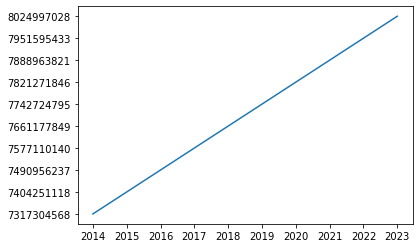

In [62]:
# Line Plot (world population extracted from https://databank.worldbank.org/)
import csv

file = open("data/world_population.csv", "r")
[year, pop] = list(csv.reader(file, delimiter=";"))
file.close()

plt.plot(year, pop)
plt.show()

#### 1) Scatter Plot 
A scatter plot is more suitable in cases such as assessing a correlation between two variables rather than observing a time data.

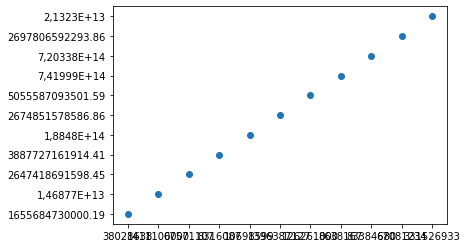

In [56]:
# Scatter Plot (each countries on the dataset to assess the correlation between population and gdp)
pop = [can_pop[-1], chn_pop[-1], fra_pop[-1], deu_pop[-1], grc_pop[-1], ind_pop[-1], jpn_pop[-1], che_pop[-1], tur_pop[-1], gbr_pop[-1], usa_pop[-1]]
gdp = [can_gdp[-1], chn_gdp[-1], fra_gdp[-1], deu_gdp[-1], grc_gdp[-1], ind_gdp[-1], jpn_gdp[-1], che_gdp[-1], tur_gdp[-1], gbr_gdp[-1], usa_gdp[-1]]

plt.scatter(pop, gdp)
plt.show()

In [59]:
can_gdp[-1]

'1655684730000.19'